
<img src="https://cursos.virtual.uniandes.edu.co/isis4219/wp-content/uploads/sites/162/2014/11/cropped-misisheader.png" ><br>
# Machine Learning Techniques - ISIS4219

Intersemestral 2020 .

# Entrega 2: Preparación de los datos

<b>Proyecto: Identificación de melanomas en imágenes de lesiones de piel</b>

Grupo 1 - Integrantes:

* Daniela María Ortiz Sánchez - 201512150
* Camilo Andrés Ladino Baquero - 201820333
* Ramiro Vargas Salas - 201910642
* Mateo Laguna Guantiva - 201414158


Los datos están disponibles en el sitio de Kaggle de la competencia: https://www.kaggle.com/c/siim-isic-melanoma-classification/data

Antes de empezar, cargaremos las principales librerías que utilizaremos a lo largo del reporte.

In [3]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 48.3MB 985kB/s
     |████████████████████████████████| 71kB 2.5MB/s 
     |████████████████████████████████| 61kB 5.6MB/s 
     |████████████████████████████████| 604kB 13.9MB/s 
     |████████████████████████████████| 3.1MB 19.9MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 296kB 42.6MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0rc1-py2.py3-none-any.whl size=258106 sha256=101ed3d5c8ed592259d2f66712ccefe87115ebc91f6f411f7f41e32b28ea3e0b
  Stored in directory: /tmp/pip-ephem-wheel-cache-701kita6/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=5c04fb4b24cbc1cfa8855096ba70b98a9c76b6002ed5b6e5b5cdfa8f74e21928
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=2

In [40]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

## Perfilamiento de los datos

Primero realizaremos el perfilamiento de los metadatos, es decir, todas las variables disponibles en la base de datos, excluyendo por ahora las imágenes.

En la siguiente tabla resumimos brevemente las variables que encontramos en la base de datos y en las cuales nos concentraremos en la presente entrega:

| Variable | Tipo | Descripción | Test/Train |
|----------|------|-------------|------------|
| Image name | String (caracter) | Código de identificación de la imagen, el cual hace referencia al nombre del archivo de la imagen. | Test y train |
| Patient ID | String (caracter) | Identificador único del paciente. | Test y train |
| Sex | String (caracter) | Sexo del paciente (hombre, mujer o desconocido) | Test y train |
| Age | Número entero | Edad aproximada del paciente en el momento en el que se tomó la imagen. | Test y train |
| Anatomic site | String (caracter) | Ubicación en el cuerpo de la imagen tomada (torso, cabeza, extremidad superior o inferior, etc.). | Test y train |
| Diagnosis | String (caracter) | Diagnóstico de la lesión: desconocido o nuevo (lunar). | Solo en train |
| Benign / Malignant | String (caracter) | Indica si la lesión es benigna o maligna (melanoma). Esta es la variable respuesta. | Solo en train |


Kaggle provee un set de train y otro de test. Sin embargo, con el set de test no es posible realizar pruebas internamente debido a que este set es el que se usa para competir, por lo cual los datos allí contenidos no están identificados como <b>benigno</b> o <b>maligno (melanoma) </b>.

De todas formas, se analizarán los datos tanto de train como de test, para asegurarnos que contamos con la misma información en ambos conjuntos.

In [6]:
train = pd.read_csv('https://raw.githubusercontent.com/ramirovargas/Proyecto_ML/master/datos/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/ramirovargas/Proyecto_ML/master/datos/test.csv')

In [7]:
train

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


In [8]:
test

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity
...,...,...,...,...,...
10977,ISIC_9992485,IP_4152479,male,40.0,torso
10978,ISIC_9996992,IP_4890115,male,35.0,torso
10979,ISIC_9997917,IP_2852390,male,25.0,upper extremity
10980,ISIC_9998234,IP_8861963,male,65.0,lower extremity


Realizamos un perfilamiento inicial de los conjuntos de train y test con Pandas Profiling

### Conjunto de train

In [ ]:
report = ProfileReport(train)
report.to_file('profile_report.html')
report

In [ ]:
from IPython.display import IFrame

IFrame(src='./profile_report.html', width=900, height=600)

A partir del análisis de Pandas Profiling, lo primero que notamos es que hay algunos avisos importantes:

1. La variable que contiene los id's de los pacientes tiene una alta cardinalidad, lo cual era de esperarse, pues hay varias imágenes que provienen del mismo paciente. Según el reporte, hay 2056 valores distintos, lo cual nos indica que las imágenes se tomaron de 2056 pacientes distintos (en promedio 16.11 imágenes por paciente)

2. Las variables *benign_malignant* (variable respuesta, Y) y *diagnosis* están altamente correlacionadas. Esto también era de esperarse, pues el diagnóstico podría tomarse como una variable respuesta. Por lo general, si la lesión es benigna, el diagnóstico se registra como *unknown* o *nevus* (si el paciente es de edad avanzada). A partir de este análisis, podemos concluir que es necesario eliminar esta variable pues claramente no la tenemos disponible en el conjunto de test:  es algo que podría ser de interés para predecir, no una variable predictora como tal.

3. La variable *anatom_site_general_challenge*, que indica la parte del cuerpo de donde se tomó la imagen, contiene 527 valores faltantes, los cuales representan el 1.6% del total de registros. Posteriormente presentaremos las decisiones que tomaremos para manejar estos valores faltantes.

4. La variable *image_name* tiene valores únicos. Esto nos indica que no hay imágenes repetidas. Sin embargo, según un aviso reciente publicado en la competencia, se identificaron varias imágenes repetidas, las cuales borraremos de la base de train, con el fin de reducir un poco el tamaño del archivo y evitar posibles sesgos.

<b> Análisis de las variables </b>

* <b> patient_id: </b> según las frecuencias mostradas por Pandas Profiling, es posible notar que no tenemos el mismo número de imágenes por paciente. Hay casos con más de 100 imágenes. 

* <b> sex: </b> la proporción de hombres y mujeres es más o menos balanceada (aunque hay más hombres que mujeres). Esta variable cuenta con 65 valores faltantes, los cuales decidiremos cómo tratar más adelante. Codificaremos la variable con one hot encoding.

* <b> age_approx: </b> el histograma de esta variable muestra que se encuentra más concentrada en valores entre los 50 y 70 años. Hay un par de registros que son 0, pero esto no es necesariamente un dato atípico pues como es la edad aproximada, una persona podría realmente tener 0 años (un neonato o un bebé). Esta variable cuenta con 68 valores faltantes, los cuales decidiremos cómo tratar más adelante.

* <b> anatom_site_general_challenge: </b> la mayoría de las imágenes fueron tomadas en el torso, seguido por las extremidades superiores e inferiores. Una menor proporción de las imágenes fueron tomadas del cuello, la cabeza, las palmas de las manos o las plantas de los pies. De acuerdo con los avisos explicados anteriormente, esta es la variable que contiene el mayor porcentaje de datos faltantes. Codificaremos la variable con one hot encoding.

* <b> diagnosis, benign_malign, target: </b> a pesar de que la variable *diagnosis* contiene un poco más de información, es casi como una variable respuesta. De estas 3 variables, nos quedaremos con *target* como variable a predecir (1 si la lesión es maligna, 0 si es benigna). Del reporte, llama mucho la atención que la base está muy desbalanceada, pues apenas tenemos 584 ejemplos de lesiones malignas dentro de los 33126 registros. Debido a esto, evaluaremos distintas técnicas para abordar apropiadamente esta situación (sobre todo bootstrapping).

A continuación, mostramos un ejemplo de las imágenes repetidas anunciadas por un usuario de Kaggle recientemente. Es posible confirmar que lo único que diferencia los registros es el nombre de la imagen.

In [9]:
train[train['image_name'] == 'ISIC_0079038']

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
17,ISIC_0079038,IP_5295861,male,70.0,torso,unknown,benign,0


In [10]:
train[train['image_name'] == 'ISIC_8521950']

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
28155,ISIC_8521950,IP_5295861,male,70.0,torso,unknown,benign,0


A propósito de las imágenes repetidas, a continuación mostramos un histograma con el número de veces que se repite el ID de un paciente en la base. Es posible notar que la gran mayoría de IDs se repiten máximo 20 veces. Los que se repiten más de este número de veces son muy poquitos (alrededor de 300). Esto puede estar relacionado con las imágenes que están repetidas.

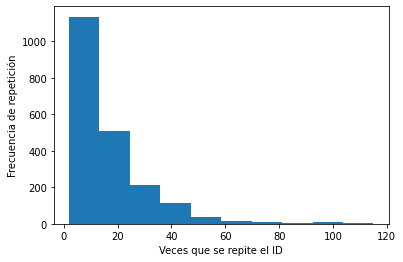

In [11]:
#Análisis de IDs únicos
unicos = train.patient_id.unique()
lista = list(train['patient_id'])
cat = list(unicos)
cuenta = []
for i in cat:
    cuenta.append(lista.count(i))
ids = {'ids_unicos':unicos,
       'freq':cuenta}
df = pd.DataFrame(ids)
plt.hist(df['freq'])
plt.xlabel('Veces que se repite el ID')
plt.ylabel('Frecuencia de repetición')
plt.show()

### Conjunto de test

In [ ]:
report_test = ProfileReport(test)
report_test.to_file('profile_report_test.html')
report_test

In [ ]:
from IPython.display import IFrame

IFrame(src='./profile_report_test.html', width=900, height=600)

Para el caso del conjunto de test, también aparecen algunos anuncios:

1. La variable *patient_id* también tiene una alta cardinalidad. En la base hay 690 pacientes distintos.
2. La variable *anatom_site_general_challenge* tiene 351 valores faltantes. Posteriormente discutiremos las decisiones que tomaremos al respecto.
3. La variable *image_name* contiene valores únicos.

<b> Análisis de las variables </b>

* <b> patient_id: </b> según las frecuencias mostradas por Pandas Profiling, también es posible notar que no tenemos el mismo número de imágenes por paciente. Ahora hay un caso con 240 imágenes. 

* <b> sex: </b> la proporción de hombres y mujeres está menos balanceada que en el conjunto de train (sigue habiendo más hombres que mujeres). Codificaremos la variable con one hot encoding.

* <b> age_approx: </b> el histograma de esta variable muestra que ahora se encuentra más concentrada en valores entre los 30 y 60 años, la distribución está sesgada más hacia el centro en comparación con el conjunto de train. Ya no hay valores faltantes.

* <b> anatom_site_general_challenge: </b> la mayoría de las imágenes fueron tomadas en el torso, seguido por las extremidades superiores e inferiores. Una menor proporción de las imágenes fueron tomadas del cuello, la cabeza, las palmas de las manos o las plantas de los pies. De acuerdo con los avisos explicados anteriormente, esta es la única variable que contiene datos faltantes. Codificaremos la variable con one hot encoding.

Como mencionamos anteriormente, este conjunto no contiene las variables de *diagnosis*, *benign_malign* y *target*, pues el objetivo es predecir *target* (es lo mismo que *benign_malign*, la cual está altamente correlacionada con *diagnosis*)

## Limpieza de los datos

### Valores Nulos

De acuerdo con el perfulamiento de los datos de entrenamiento, se detectan las siguientes tres variables que contienen valores nulos: `age_approx`, `sex` y `anatom_site_general_challenge`. 

A continuación, se realiza el tratamiento de cada una de ellas.

Inicialmente, se realiza el análisis sobre las variables `sex` y `age_approx`. A continuación, se presenta una gráfica donde se puede observar la distribución de los datos que no contienen valor en la columna `sex` o `age_approx`, con respecto a la variable de predicción ´target´. (Tener en cuenta que 1 representa los melanomas o lesiones malignas)

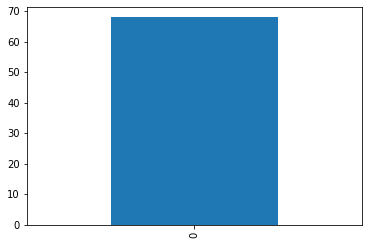

In [12]:
#Análisis de valores nulos en 'sex' y 'age_approx'
pd.value_counts(train[(train.sex.isna()) | (train.age_approx.isna())]['target']).plot.bar()


Como se puede evidenciar en la gráfica anterior, todos los registros que poseen un valor nulo en la variable `sex` y/o `age_approx`, corresponden a lesiones benignas. Teniendo en cuenta que el conjunto de datos está desbalanceado (mayoría de registros con lesiones benignas), que no se cuenta con información adicional del negocio que permita hacer una aproximación y/o predicción del género y la edad de un paciente, y que son muy pocos registros con género y/o edad nula con respecto al conjunto de datos (68 de 33.126), se toma la decisión de omitir aquellos registros que contienen valores nulos de género y/o edad.

In [13]:
train = train[~((train.age_approx.isna()) | (train.age_approx.isna()))]

Esta misma operación, se aplica sobre el conjunto de datos de prueba con el fin de garantizar la coherencia entre los dos conjuntos de datos:

In [14]:
test = test[~((test.age_approx.isna()) | (test.age_approx.isna()))]

Finalmente, se realiza el análisis sobre la variable `anatom_site_general_challenge`. A continuación, se presenta una gráfica donde se puede observar la distribución de los datos que no contienen valor en la columna `anatom_site_general_challenge`, con respecto a la variable de predicción ´target´. (Tener en cuenta que 1 representa los melanomas o lesiones malignas)

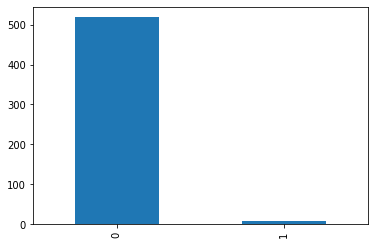

In [15]:
#Análisis de valores nulos en 'anatom_site_general_challenge'
pd.value_counts(train[train.anatom_site_general_challenge.isna()]['target']).plot.bar()

Como se puede observar en la gráfica anterior, aunque la mayoría de los registros que contienen valor nulo en la variable `anatom_site_general_challenge` son lesiones benignas, tambien se tienen registros de lesiones malignas. Sin embargo, no se cuenta con información adicional del negocio que permita hacer una aproximación y/o predicción del lugar del cuerpo del paciente del cual se capturó la imagen, y tampoco se considera conveniente omitir estos registros ya que se perderían lesiones malignas (existen muy pocos registros de esta clase), o si se eliminan solo las lesiones benignas, se podría introducir algún tipo de sesgo en el modelo. Por esta razón, se decide adicionar una nueva categoría para esta variable que represente el desconocimiento de la parte del cuerpo a la que pertenece la imagen, y trabajar el conjunto de datos teniendo en cuenta esta categoría.

In [16]:
train['anatom_site_general_challenge'] = train['anatom_site_general_challenge'].fillna('unknown')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Esta misma operación, se aplica sobre el conjunto de datos de prueba con el fin de garantizar la coherencia entre los dos conjuntos de datos:

In [17]:
test['anatom_site_general_challenge'] = test['anatom_site_general_challenge'].fillna('unknown')

Finalmente, se genera un nuevo reporte de perfilamiento de los datos con el fin de evidenciar la limpieza realizada anteriormente:

In [ ]:
report = ProfileReport(train, minimal=True)
report

## Preparación (selección de variables, transformaciones, normalización, etc.)

### Conjunto de Train





In [26]:
train.columns

Index(['image_name', 'patient_id', 'age_approx', 'diagnosis',
       'benign_malignant', 'target', 'anatom_site_general_challenge_head/neck',
       'anatom_site_general_challenge_lower extremity',
       'anatom_site_general_challenge_oral/genital',
       'anatom_site_general_challenge_palms/soles',
       'anatom_site_general_challenge_torso',
       'anatom_site_general_challenge_unknown',
       'anatom_site_general_challenge_upper extremity', 'sex_female',
       'sex_male'],
      dtype='object')



OneHotEncoding para anatom_site_general_challenge (parte del cuerpo de la anomalia)

In [19]:
train['anatom_site_general_challenge'] = train['anatom_site_general_challenge'].astype(str)
train = pd.get_dummies(train, columns=['anatom_site_general_challenge'])
train

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,image_name,patient_id,sex,age_approx,diagnosis,benign_malignant,target,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_unknown,anatom_site_general_challenge_upper extremity
0,ISIC_2637011,IP_7279968,male,45.0,unknown,benign,0,1,0,0,0,0,0,0
1,ISIC_0015719,IP_3075186,female,45.0,unknown,benign,0,0,0,0,0,0,0,1
2,ISIC_0052212,IP_2842074,female,50.0,nevus,benign,0,0,1,0,0,0,0,0
3,ISIC_0068279,IP_6890425,female,45.0,unknown,benign,0,1,0,0,0,0,0,0
4,ISIC_0074268,IP_8723313,female,55.0,unknown,benign,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,unknown,benign,0,0,0,0,0,1,0,0
33122,ISIC_9999320,IP_3650745,male,65.0,unknown,benign,0,0,0,0,0,1,0,0
33123,ISIC_9999515,IP_2026598,male,20.0,unknown,benign,0,0,1,0,0,0,0,0
33124,ISIC_9999666,IP_7702038,male,50.0,unknown,benign,0,0,1,0,0,0,0,0


In [ ]:
OneHotEncoding para Sex (Masculino o Femenino)

In [20]:
train['sex'] = train['sex'].astype(str)
train = pd.get_dummies(train, columns=['sex'])
train

,image_name,patient_id,age_approx,diagnosis,benign_malignant,target,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_unknown,anatom_site_general_challenge_upper extremity,sex_female,sex_male
0,ISIC_2637011,IP_7279968,45.0,unknown,benign,0,1,0,0,0,0,0,0,0,1
1,ISIC_0015719,IP_3075186,45.0,unknown,benign,0,0,0,0,0,0,0,1,1,0
2,ISIC_0052212,IP_2842074,50.0,nevus,benign,0,0,1,0,0,0,0,0,1,0
3,ISIC_0068279,IP_6890425,45.0,unknown,benign,0,1,0,0,0,0,0,0,1,0
4,ISIC_0074268,IP_8723313,55.0,unknown,benign,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,50.0,unknown,benign,0,0,0,0,0,1,0,0,0,1
33122,ISIC_9999320,IP_3650745,65.0,unknown,benign,0,0,0,0,0,1,0,0,0,1
33123,ISIC_9999515,IP_2026598,20.0,unknown,benign,0,0,1,0,0,0,0,0,0,1
33124,ISIC_9999666,IP_7702038,50.0,unknown,benign,0,0,1,0,0,0,0,0,0,1


Se eliminan las columnas en Train que no son necesarias

In [49]:
X=train.drop(columns=['benign_malignant','target','diagnosis','image_name','patient_id'])

Division del conjunto de Train

In [50]:
columns = X.columns

In [51]:
pipeline_cleaning = Pipeline([
 ('normalization', MinMaxScaler(feature_range=(0, 1))),
 ])

In [53]:
X = pipeline_cleaning.fit_transform(X)

In [54]:
X = pd.DataFrame(X,columns=columns)
X

,age_approx,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_unknown,anatom_site_general_challenge_upper extremity,sex_female,sex_male
0,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.555556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.500000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.611111,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
33053,0.555556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
33054,0.722222,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
33055,0.222222,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33056,0.555556,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
Y = train[['target']]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

### Conjunto de Test

In [24]:
test.columns

Index(['image_name', 'patient_id', 'age_approx',
       'anatom_site_general_challenge_head/neck',
       'anatom_site_general_challenge_lower extremity',
       'anatom_site_general_challenge_oral/genital',
       'anatom_site_general_challenge_palms/soles',
       'anatom_site_general_challenge_torso',
       'anatom_site_general_challenge_unknown',
       'anatom_site_general_challenge_upper extremity', 'sex_female',
       'sex_male'],
      dtype='object')


OneHotEncoding para anatom_site_general_challenge (parte del cuerpo de la anomalia)

In [21]:
test['anatom_site_general_challenge'] = test['anatom_site_general_challenge'].astype(str)
test = pd.get_dummies(test, columns=['anatom_site_general_challenge'])
test

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_unknown,anatom_site_general_challenge_upper extremity
0,ISIC_0052060,IP_3579794,male,70.0,0,0,0,0,0,1,0
1,ISIC_0052349,IP_7782715,male,40.0,0,1,0,0,0,0,0
2,ISIC_0058510,IP_7960270,female,55.0,0,0,0,0,1,0,0
3,ISIC_0073313,IP_6375035,female,50.0,0,0,0,0,1,0,0
4,ISIC_0073502,IP_0589375,female,45.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
10977,ISIC_9992485,IP_4152479,male,40.0,0,0,0,0,1,0,0
10978,ISIC_9996992,IP_4890115,male,35.0,0,0,0,0,1,0,0
10979,ISIC_9997917,IP_2852390,male,25.0,0,0,0,0,0,0,1
10980,ISIC_9998234,IP_8861963,male,65.0,0,1,0,0,0,0,0


OneHotEncoding para Sex (Masculino o Femenino)

In [22]:
test['sex'] = test['sex'].astype(str)
test = pd.get_dummies(test, columns=['sex'])
test

,image_name,patient_id,age_approx,anatom_site_general_challenge_head/neck,anatom_site_general_challenge_lower extremity,anatom_site_general_challenge_oral/genital,anatom_site_general_challenge_palms/soles,anatom_site_general_challenge_torso,anatom_site_general_challenge_unknown,anatom_site_general_challenge_upper extremity,sex_female,sex_male
0,ISIC_0052060,IP_3579794,70.0,0,0,0,0,0,1,0,0,1
1,ISIC_0052349,IP_7782715,40.0,0,1,0,0,0,0,0,0,1
2,ISIC_0058510,IP_7960270,55.0,0,0,0,0,1,0,0,1,0
3,ISIC_0073313,IP_6375035,50.0,0,0,0,0,1,0,0,1,0
4,ISIC_0073502,IP_0589375,45.0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10977,ISIC_9992485,IP_4152479,40.0,0,0,0,0,1,0,0,0,1
10978,ISIC_9996992,IP_4890115,35.0,0,0,0,0,1,0,0,0,1
10979,ISIC_9997917,IP_2852390,25.0,0,0,0,0,0,0,1,0,1
10980,ISIC_9998234,IP_8861963,65.0,0,1,0,0,0,0,0,0,1


## Justificación general de las decisiones tomadas

*   OneHotEncoding nos ayuda a pasar las variables que tenemos categorias de nominales a binario esto ayuda a nuestro modelo a una mejor precision al tener valores numericos de las categorias. 

*   Se elimino las variables de Train que no estaban en el conjunto de Test (diagnosis) ademas de las variables que vamos a predecir.

*   Se Determina que la variable a predecir target se encuentra desbalanceada por lo cual se va a tener en cuenta un metodo de ensabler para el modelamiento y mejora de la prediccion.

*   Se divide el conjunto de Train para tener un conjunto de Validacion.

*   Se realizo el analisis con el metodo de clasificacion de Naive Bayes con los datos de Train los cuales nos daban una prediccion correcta  del 100% , pero este analisis no tuvo en cuenta los metadatos de la imagenes, a si mismo se concluye que todas las variables son necesarias ya que nos identifica las imagenes y nos dan metadatos necesarios al negocio.

![](https://raw.githubusercontent.com/ramirovargas/Proyecto_ML/master/datos/weka.jpg)

